<a href="https://colab.research.google.com/github/MohsenShekarbaigi/mydjangoBlog/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
(60000, 784)
(10000, 784)
Epoch 1/10
235/235 [==============================] - 16s 13ms/step - loss: 0.3809 - val_loss: 0.1921
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1815 - val_loss: 0.1526
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1486 - val_loss:

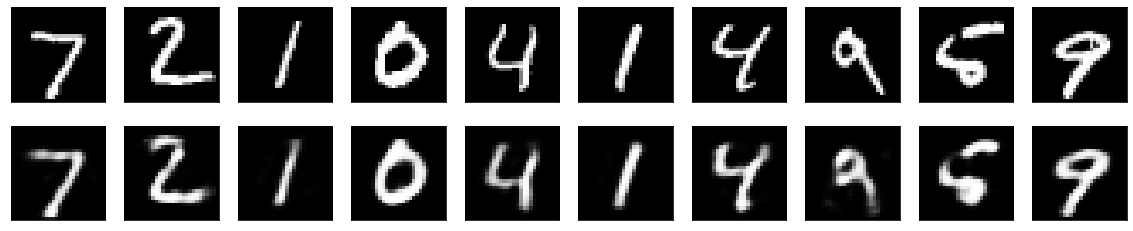

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

#============== Prepare our dataset

# Download dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Load local dataset
# Path is relative to c:/users/<your username>/.keras/datasets
#(x_train, _), (x_test, _) = mnist.load_data(path='mnist.npz')


#============== Prepare our Model
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# compile our model and print a summary of it
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

#============== Train our Model

# normalize all values between 0-1 and we will flatten the images into vectors
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

#  train our autoencoder
n_epochs = 10
autoencoder.fit(x_train, x_train,
                epochs=n_epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#============== Visualize our results

# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
